1 Supervised Learning (Classification with Scikit-learn)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Load dataset
data = load_iris()
X = data.data
y = data.target



In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [4]:
# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [5]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


2. Unsupervised Learning (Clustering with KMeans)

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


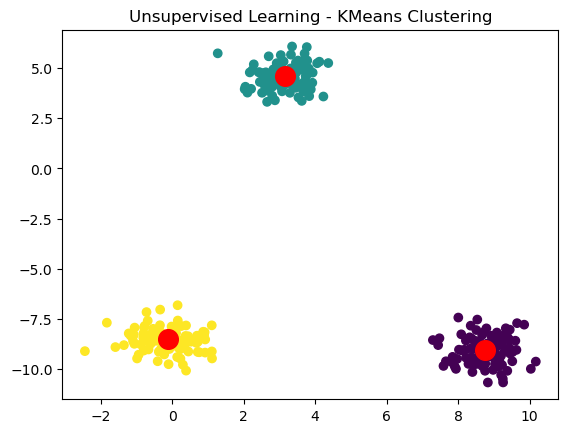

In [7]:
# Fit KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Unsupervised Learning - KMeans Clustering")
plt.show()

3. Reinforcement Learning (Q-Learning in Grid World)

In [8]:
import numpy as np
import random

# Define environment
n_states = 5  # positions 0 to 4
actions = [0, 1]  # 0 = left, 1 = right
q_table = np.zeros((n_states, len(actions)))

# Parameters
alpha = 0.1     # learning rate
gamma = 0.9     # discount factor
epsilon = 0.1   # exploration rate
episodes = 100

In [9]:
# Rewards
rewards = [0, 0, 0, 0, 1]  # Reward at last state

# Q-learning loop
for episode in range(episodes):
    state = 0
    while state != 4:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = np.argmax(q_table[state])
            # Take action
        next_state = state + 1 if action == 1 else max(0, state - 1)
        reward = rewards[next_state]
        
        # Update Q-table
        q_table[state, action] = q_table[state, action] + alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )
        
        state = next_state

print("Trained Q-table:")
print(q_table)

Trained Q-table:
[[0.08947821 0.72488157]
 [0.1971374  0.80893288]
 [0.25718141 0.89975563]
 [0.27783821 0.99997344]
 [0.         0.        ]]
